# SeSiMe
### Sentence/Sequence Similarity Measure

### (2) Mass spec side
Import MS data and create documents.

Here: Use NOT Crusemann data, but other dataset where smilea are known for all spectra.

In [2]:
# data locations
# Windows 
ROOT = "C:\\OneDrive - Netherlands eScience Center\\Project_Wageningen_iOMEGA"
PATH_MS_DATA = ROOT + "\\SeSiMe\\data\\spectra_gnps\\"
PATH_SAVE_DATA = ROOT + "\\SeSiMe\\data\\"

In [1]:
# data locations
# Ubuntu VM
ROOT = "/media/sf_OneDrive-nlesc/Project_Wageningen_iOMEGA"
PATH_MS_DATA = ROOT + "/SeSiMe/data/spectra_gnps/"
PATH_SAVE_DATA = ROOT + "/SeSiMe/data/"

In [2]:
import MS_functions

spectra, spectra_dict, MS_documents, MS_documents_intensity = MS_functions.load_MS_data(PATH_MS_DATA, PATH_SAVE_DATA,
                                        filefilter="*.ms",
                                         results_file = "MS_collected_data.json",
                                         num_decimals = 3,
                                         min_frag = 0.0, max_frag = 1200.0,
                                         min_loss = 10.0, max_loss = 500.0,
                                         min_intensity_perc = 0.0,
                                         exp_intensity_filter = 0.01,
                                         min_peaks = 10,
                                         merge_energies = True,
                                         merge_ppm = 5,
                                         replace = 'max')

Spectra json file found and loaded.


In [3]:
# Have a look at how a document looks like:
print(MS_documents[1])

['peak_146.937', 'peak_163.910', 'peak_171.848', 'peak_181.835', 'peak_182.754', 'peak_199.845', 'peak_200.778', 'peak_217.832', 'peak_223.989', 'peak_307.719', 'peak_313.898', 'peak_352.251', 'peak_370.019', 'peak_378.005', 'peak_387.998', 'peak_406.004', 'peak_420.102', 'peak_423.253', 'peak_423.917', 'loss_309.314', 'loss_292.341', 'loss_284.403', 'loss_274.416', 'loss_273.497', 'loss_256.407', 'loss_255.473', 'loss_238.419', 'loss_232.262', 'loss_148.532', 'loss_142.353', 'loss_104.000', 'loss_86.232', 'loss_78.246', 'loss_68.253', 'loss_50.247', 'loss_36.150', 'loss_32.998', 'loss_32.335']


#### Switch to general SeSiMe functionality
Once we have a corpus (e.g. through cells above), we can use SeSiMe to apply different similarity measuring methds. 

In [3]:
from Similarities import SimilarityMeasures

MS_measure = SimilarityMeasures(MS_documents)

Using TensorFlow backend.


In [4]:
MS_measure.preprocess_documents(0.2, create_stopwords = False)

Preprocess documents...


### Word2Vec -based approach
Create Word2Vec based document centroid vectors.

Since spectra are built from manyn more possible words (much larger "dictionary"), vectors are reduced to 200 (instead of 100) dimensions.

In [5]:
#file_model_word2vec = 'data\\model_word2vec_MS_ref_d200.model' 
file_model_word2vec = 'data/model_word2vec_MS_ref_d200.model' 
MS_measure.build_model_word2vec(file_model_word2vec, size=200, window=50, 
                             min_count=1, workers=4, iter=250, 
                             use_stored_model=True)

Load stored word2vec model ...


In [6]:
MS_measure.get_vectors_centroid(weighted=True)
MS_measure.get_centroid_distances(num_hits=25, method='cosine')

  Calculated centroid vectors for  5770  of  5770  documents. of  5770  documents.  of  5770  documents. 2170  of  5770  documents. documents. 5770  documents.5770  documents.5770  documents.  documents.5770  documents.

This has calculated (cosine) distances between all BGCs in an all-vs-all fashion.
The "num_hits" closest candidates for each BGC are listed in two matrices.

One stores the distances, the other the respective IDs.

In [14]:
MS_measure.Cdistances_ctr[1,:]

array([0.        , 0.33866781, 0.38053115, 0.38131775, 0.39100902,
       0.40501275, 0.41333177, 0.41938641, 0.42062295, 0.42464298,
       0.42514339, 0.43225172, 0.43933217, 0.44338653, 0.44664969,
       0.44789842, 0.44986025, 0.45374811, 0.45463476, 0.45790875,
       0.45999109, 0.46066714, 0.46180379, 0.46511136, 0.46740212])

In [15]:
MS_measure.Cdistances_ctr_idx[1,:]

array([   1, 5236, 5166, 5245,  979, 5232,  897, 5276, 5192, 5201, 5231,
       1650, 4592, 5258, 5229, 2916, 5274, 5235, 5208, 5157, 5288, 5256,
       5303, 5203, 5175])

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
ax.matshow(MS_measure.Cdistances_ctr[:45,:25], cmap=plt.cm.Blues)

### Plot molecules from smiles to visually compare selected spectra

In [7]:
MS_functions.plot_smiles(85, spectra_dict, MS_measure, num_candidates = 10, 
                   sharex=True, labels=False, dist_method = "centroid", plot_type="multi")

OSError: cannot identify image file <_io.BytesIO object at 0x7f3d7371a150>

### Try different similarity measuring methods...

#### A) Autoencoder
Will train a deep autoencoder to generate 100 dimensional (or = encoding_dim) vectors representing each document. 

In [ ]:
file_model_ae = 'data\\model_autoencoder_MS_ref.h5'
file_model_encoder = 'data\\model_encoder_MS_ref.h5'
MS_measure.build_autoencoder(file_model_ae, file_model_encoder, epochs = 20, batch_size = 1024, encoding_dim = 200)

No stored model found!
Creating new autoencoder model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1600)              114297600 
_________________________________________________________________
dense_2 (Dense)              (None, 800)               1280800   
_________________________________________________________________
dense_3 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_4 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_5 (Dense)              (None, 400)               80400     
_________________________________________________________________
dense_6 (Dense)              (None, 800)               320800    
_________________________________________________________________
dense_7 (Dense)    

In [14]:
MS_measure.get_autoencoder_distances(num_hits=25, method='cosine')

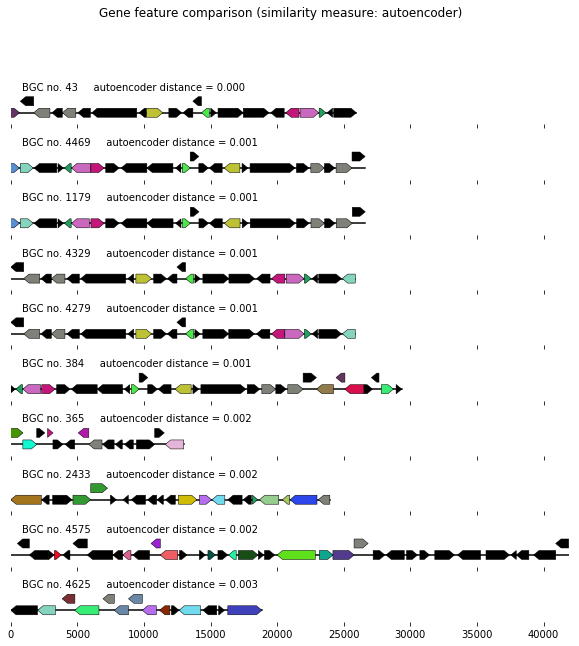

In [15]:
MS_functions.plot_smiles(85, spectra_dict, MS_measure, num_candidates = 10, 
                   sharex=True, labels=False, dist_method = "autoencoder")

#### B) PCA
Will calulate 200 dimensional representations of each document using PCA.

In [17]:
MS_measure.get_vectors_pca(200)

In [18]:
MS_measure.get_pca_distances(num_hits=25, method='cosine')

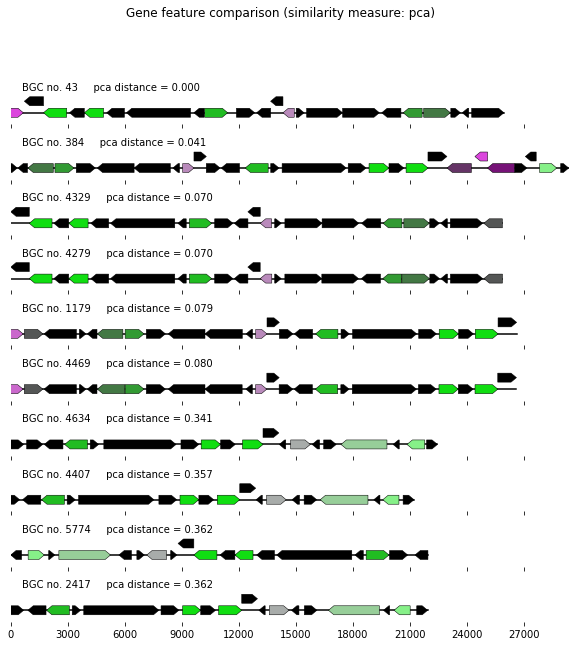

In [19]:
MS_functions.plot_smiles(85, spectra_dict, MS_measure, num_candidates = 10, 
                   sharex=True, labels=False, dist_method = "pca")

#### C) Doc2Vec
Will calulate 100 dimensional representations of each document using Doc2Vec.

In [20]:
file_model_doc2vec = "data\\model_doc2vec_MS_ref.model"
MS_measure.build_model_doc2vec(file_model_doc2vec, vector_size=100, window=50, 
                             min_count=1, workers=4, epochs=250, 
                             use_stored_model=True)

Stored doc2vec model not found!
Calculating new doc2vec model...


In [21]:
MS_measure.get_doc2vec_distances(num_hits=25, method='cosine')

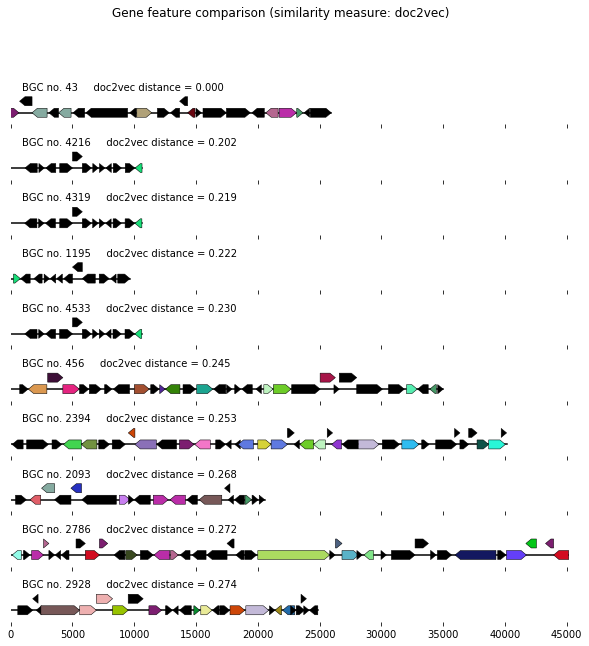

In [22]:
MS_functions.plot_smiles(85, spectra_dict, MS_measure, num_candidates = 10, 
                   sharex=True, labels=False, dist_method = "pca")

#### D) LDA
Will calulate document distances using LDA.

In [23]:
file_model_lda = "data\\model_lda_MS_ref.model"
MS_measure.build_model_lda(file_model_lda, num_of_topics=200, num_pass=4, 
                        num_iter=100, use_stored_model=True)

Stored LDA model not found!
Calculating new LDA model...


C:\Users\FlorianHuber\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


'Keyword in the 10 topics'
[(5,
  '0.090*"pf00415" + 0.077*"pf13540" + 0.055*"pf07690" + 0.045*"pf00528" + '
  '0.035*"pf13531" + 0.029*"pf00805" + 0.029*"pf13416" + 0.029*"pf01547" + '
  '0.027*"pf01978" + 0.026*"pf07784"'),
 (80,
  '0.037*"pf12802" + 0.029*"pf01022" + 0.029*"pf12840" + 0.029*"pf13412" + '
  '0.027*"pf01978" + 0.019*"pf03935" + 0.018*"pf00532" + 0.016*"pf11187" + '
  '0.016*"pf13377" + 0.015*"pf01867"'),
 (26,
  '0.073*"pf00415" + 0.056*"pf13540" + 0.049*"pf01266" + 0.038*"pf13738" + '
  '0.030*"pf07992" + 0.028*"pf13454" + 0.027*"pf13450" + 0.027*"pf00111" + '
  '0.026*"pf12831" + 0.025*"pf03486"'),
 (24,
  '0.038*"pf01266" + 0.027*"pf02737" + 0.023*"pf02518" + 0.023*"pf00072" + '
  '0.018*"pf00378" + 0.018*"pf12681" + 0.018*"pf00083" + 0.018*"pf01494" + '
  '0.017*"pf07690" + 0.016*"pf00070"'),
 (72,
  '0.072*"pf00415" + 0.061*"pf13540" + 0.034*"pf00501" + 0.032*"pf07690" + '
  '0.031*"pf00550" + 0.029*"pf13193" + 0.028*"pf00668" + 0.028*"pf13745" + '
  '0.016*"pf14

In [24]:
MS_measure.get_lda_distances(num_hits=25)

C:\Users\FlorianHuber\Anaconda3\lib\site-packages\gensim\matutils.py:718: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


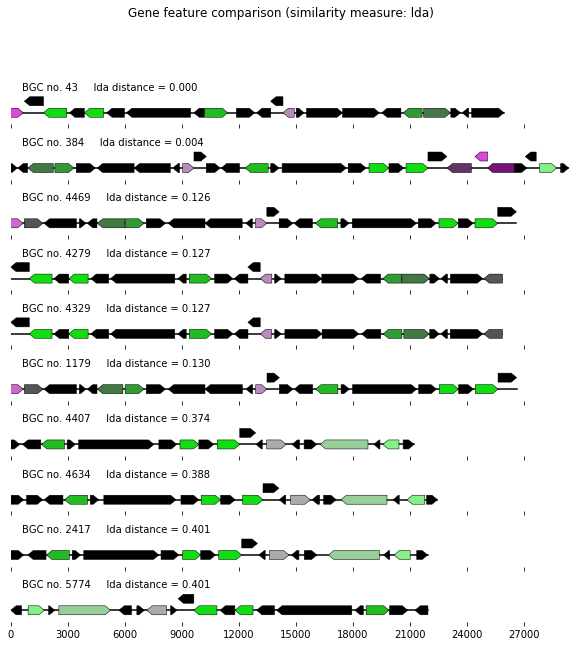

In [25]:
MS_functions.plot_smiles(85, spectra_dict, MS_measure, num_candidates = 10, 
                   sharex=True, labels=False, dist_method = "lda")

#### E) LSI
Will calulate document distances using LSI.

In [26]:
file_model_lsi = "data\\model_lsi_MS_ref.model"
MS_measure.build_model_lsi(file_model_lsi, num_of_topics=200, 
                             use_stored_model=True)

Stored LSI model not found!
Calculating new LSI model...


In [27]:
MS_measure.get_lsi_distances(num_hits=25)

C:\Users\FlorianHuber\Anaconda3\lib\site-packages\gensim\matutils.py:718: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


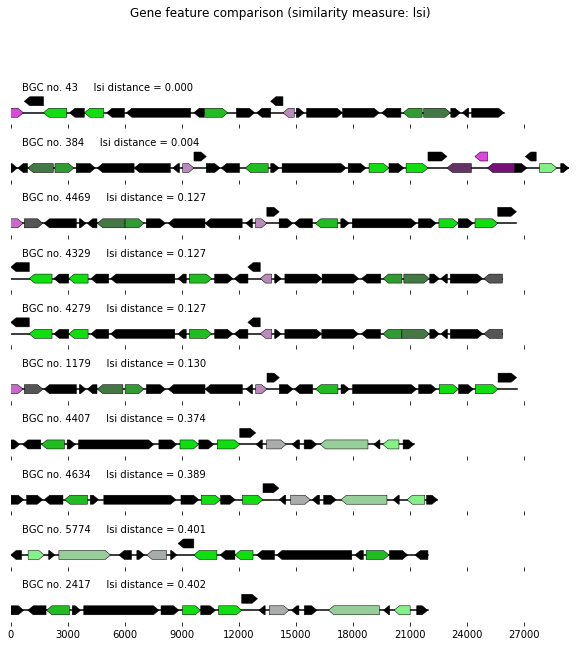

In [28]:
MS_functions.plot_smiles(85, spectra_dict, MS_measure, num_candidates = 10, 
                   sharex=True, labels=False, dist_method = "lsi")